# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import requests
import io
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime as dt


twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Read image prediction with request

r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv').content

predi_to_csv = pd.read_csv(io.StringIO(r.decode('utf-8')))
predi_to_csv = predi_to_csv.to_csv('predi_table.csv', index=False)
predi_table_df = pd.read_csv('predi_table.csv', sep ='\t')

predi_table_df.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# Get additional data with Twitter-Api

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()

with open('tweet-json.txt', 'w') as outfile:

    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.error.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [4]:
# Read collected data in DataFrame

tweets_list =[]
with open('tweet-json.txt') as json_file:
    for line in json_file:
    
        tweets_dict = {}
        tweets_json = json.loads(line)
        
        tweets_dict['tweet_id'] = tweets_json['id']
        tweets_dict['retweet_count'] = tweets_json['retweet_count']
        tweets_dict['favorite_count'] = tweets_json['favorite_count']
        
        tweets_list.append(tweets_dict)
        
tweets_api = pd.DataFrame(tweets_list)

tweets_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7068,34099
1,892177421306343426,5342,29592
2,891815181378084864,3510,22287
3,891689557279858688,7280,37267
4,891327558926688256,7810,35623


# Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [5]:
# --- Assesing twitter_archiv ---

#Assesing twitter_archive
#twitter_archive.info()
#twitter_archive.head()
#twitter_archive.tweet_id.duplicated().value_counts()
#twitter_archive.text.duplicated().value_counts()
#twitter_archive.source.duplicated().value_counts()
#twitter_archive.name.duplicated().value_counts()
#twitter_archive_c.name.value_counts()
#twitter_archive.expanded_urls.duplicated().value_counts()


# --- Test how much rows in the retweet columns ---

retweeted_status_id_ass = twitter_archive[~twitter_archive['retweeted_status_id'].isnull()]
retweeted_status_user_id_ass = twitter_archive[~twitter_archive['retweeted_status_user_id'].isnull()]
retweeted_status_timestamp_ass = twitter_archive[~twitter_archive['retweeted_status_timestamp'].isnull()]

#retweeted_status_id_ass.retweeted_status_id.value_counts().sum()
#retweeted_status_user_id_ass.retweeted_status_user_id.value_counts().sum()
retweeted_status_timestamp_ass.retweeted_status_timestamp.value_counts().sum()



181

In [6]:
# Checking wrong names in 'name' 
for c in twitter_archive.name:
    if c.islower():
        print(c)

such
a
quite
quite
quite
not
one
incredibly
a
mad
an
very
a
very
just
my
one
not
his
one
a
a
a
an
very
actually
a
just
getting
mad
very
this
unacceptable
all
a
old
a
infuriating
a
a
a
an
a
a
very
getting
just
a
the
the
actually
by
a
officially
a
the
the
a
a
a
a
life
a
one
a
a
a
light
just
space
a
the
a
a
a
a
a
a
a
a
a
an
a
the
a
a
a
a
a
a
a
a
a
a
a
quite
a
an
a
an
the
the
a
a
an
a
a
a
a


In [7]:
# Assesing predi_table_df

predi_table_df.head()
#predi_table_df.info()
#predi_table_df[predi_table_df['img_num'] == 1].count()
#predi_table_df.jpg_url.value_counts()
#predi_table_df.describe()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
# Assesing tweets_api

tweets_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


### Quality issues
1. Timestamp (twitter_archive) column has to be DateTime Data-Type 
 
2. Change Data-Types: ID's in all Tables should be Object Data-Type

3. Dog-Names in few rows seems wrong (twitter_archive) 

4. We just need the original posts - resposts can be deleted (twitter_archive)

5. img_num change Data-Type to int

6. There are some Columns that are not needed

7. Missing URL's in expand URL'S

8. Dog breeds can be standardized

### Tidiness issues
1. doggo, floofer, pupper, puppo can be can be summarized or deleted (twitter_archive)

2. Merge all tables and delete not necessary ID colums


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [40]:
# Make copies of original pieces of data

twitter_archive_c = twitter_archive.copy()
predi_table_df_c = predi_table_df.copy()
tweets_api_c = tweets_api.copy()

### Quality issues #1:

Timestamp (in WeRateDogs) column has to be DateTime Data-Type 

#### Define:

The Data-Type from the Column 'timestamp' in the table 'twitter_archive' has to be changed from string to DateType

#### Code

In [41]:
# Convert twitter_archive_c 'timestamp' from string do DateTime

twitter_archive_c['timestamp'] = pd.to_datetime(twitter_archive_c['timestamp'], format = "%Y-%m-%d ")
twitter_archive_c['timestamp'] = pd.to_datetime(twitter_archive_c.timestamp).dt.tz_localize(None)

#### Test

In [42]:
# # Test if twitter_archive_c 'timestamp' converted in DateTime DataType

twitter_archive_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

### Quality issues #2:

Change Data-Types: ID's in all Tables should be Object Data-Type

#### Define:

The Data-Types from all the ID's Colums in all tables have to be changed from int to string, because we don't need to calculate with them.

#### Code

In [43]:
# Convert twitter_archive_c 'tweet_id' from int to string

twitter_archive_c['tweet_id'] = twitter_archive_c['tweet_id'].map(str)

In [44]:
# Convert predi_table_df_c 'tweet_id' from int to string

predi_table_df_c['tweet_id'] = predi_table_df_c['tweet_id'].map(str)

In [45]:
# Convert twitter_archive_c 'tweet_id' from int to string

tweets_api_c['tweet_id'] = tweets_api_c['tweet_id'].map(str)

#### Test

In [46]:
# Test if all ID's from all tables converted in 'string' DataType

#twitter_archive_c.info()
#predi_table_df_c.info()
tweets_api_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   object
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


### Quality issues #3:

Dog-Names in few rows seems wrong (twitter_archive)

#### Define:

Some names of the dogs in the 'name' column in the 'twitter_archive' table has to be deleted for analysis purposes

#### Code

In [47]:
# Delete names with lowercase and first letter
twitter_archive_c = twitter_archive_c[[i[0].isupper() for i in twitter_archive_c['name'].values]]

# Delete all rows with 'None'
twitter_archive_c = twitter_archive_c.drop(twitter_archive_c[twitter_archive_c.name == 'None'].index)

#### Test

In [48]:
# Test if all Names with lowercase letter are deleted
for c in twitter_archive_c.name:
    if c.islower():
        print(c)
        
# Test if all rows with 'None' are deleted
twitter_archive_c.name.value_counts().head()        
#twitter_archive_c.head()

Charlie    12
Lucy       11
Cooper     11
Oliver     11
Lola       10
Name: name, dtype: int64

### Quality issues #4:

We just need the original posts - resposts can be deleted (twitter_archive)

#### Define:

For a correct analysis we just need the original posts. In the next step we will delete the retweets in the 'twitter_archive_c' table.

#### Code

In [49]:
# Select rows with content

twitter_archive_c_i = twitter_archive_c[~twitter_archive['retweeted_status_id'].isnull()]
twitter_archive_c_u = twitter_archive_c[~twitter_archive['retweeted_status_user_id'].isnull()]
twitter_archive_c_t = twitter_archive_c[~twitter_archive['retweeted_status_timestamp'].isnull()]

#Delete rows with values'retweeted_status_id'
twitter_archive_c_i = twitter_archive_c_i['retweeted_status_id']
twitter_archive_c = twitter_archive_c[twitter_archive_c.retweeted_status_id.isin(twitter_archive_c_i) == False]

#Delete rows with values 'retweeted_status_user_id'
twitter_archive_c_u = twitter_archive_c_u['retweeted_status_user_id']
twitter_archive_c = twitter_archive_c[twitter_archive_c.retweeted_status_user_id.isin(twitter_archive_c_u) == False]

#Delete rows with values 'retweeted_status_timestamp'
twitter_archive_c_t = twitter_archive_c_t['retweeted_status_timestamp']
twitter_archive_c = twitter_archive_c[twitter_archive_c.retweeted_status_timestamp.isin(twitter_archive_c_t) == False]


/var/folders/hv/bc_z390526x7_p27dt9n021m0000gn/T/ipykernel_1171/567616926.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  twitter_archive_c_i = twitter_archive_c[~twitter_archive['retweeted_status_id'].isnull()]
/var/folders/hv/bc_z390526x7_p27dt9n021m0000gn/T/ipykernel_1171/567616926.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  twitter_archive_c_u = twitter_archive_c[~twitter_archive['retweeted_status_user_id'].isnull()]
/var/folders/hv/bc_z390526x7_p27dt9n021m0000gn/T/ipykernel_1171/567616926.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  twitter_archive_c_t = twitter_archive_c[~twitter_archive['retweeted_status_timestamp'].isnull()]


#### Test

In [50]:
# Test if rows are deleted

#twitter_archive_c.retweeted_status_id.value_counts().sum()
#twitter_archive_c.retweeted_status_user_id.value_counts().sum()
twitter_archive_c.retweeted_status_timestamp.value_counts().sum()

0

### Quality issues #5:

img_num change Data-Type to string

#### Define:

The 'img_num' Caolumn in the 'predi_table_df_c' DataFrame has the wrong Data-Type. We dont need to calculate with it thats why we will change the DataType from int to string.

#### Code

In [51]:
# Convert predi_table_df_c 'img_num' from int to string

predi_table_df_c['img_num'] = predi_table_df_c['img_num'].map(str)

#### Test

In [52]:
# Test if predi_table_df_c 'img_num' converted from int to string

predi_table_df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   object 
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), object(6)
memory usage: 152.1+ KB


### Quality issues #6:

There are some Columns that are not needed

#### Define:

We can drop in_reply_to_status_id, in_reply_to_user_id because there have many NaN Values and rename tweet_id for the later merge.

#### Code

In [53]:
# Delete in_reply_to_status_id', 'in_reply_to_user_id' in 'twitter_archive_c'

twitter_archive_c = twitter_archive_c.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)
twitter_archive_c = twitter_archive_c.rename(columns={'tweet_id': 'tweet_id_main'})

#### Tets

In [54]:
# Test if Columns are deleted

twitter_archive_c.head()

,tweet_id_main,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Quality issues #7:

Missing URL's in expand URL'S

#### Define:

Delete all rows in 'expanded_urls' from 'twitter_archive_c' that have no expanded urls

#### Code

In [55]:
# Replace empty rows in 'expanded_urls' with NaN Value and drop it

twitter_archive_c['expanded_urls'].replace('', np.nan, inplace=True)
twitter_archive_c.dropna(subset=['expanded_urls'], inplace=True)

#### Test

In [56]:
# Test if all empty rows in 'expanded_urls' are deleted

twitter_archive_c[twitter_archive_c['expanded_urls'].isnull()]
#twitter_archive_c.head()

,tweet_id_main,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality issues #8:
Dog breeds can be standardized


#### Define:
In mission to do a functional analysis we have to capitalize all first letters from the dog breeds names.


#### Code

In [57]:
# Capitalize the columns 'p1', 'p2', 'p3' in 'predi_table_df_c'

predi_table_df_c['p1'] = predi_table_df_c['p1'].str.capitalize() 
predi_table_df_c['p2'] = predi_table_df_c['p2'].str.capitalize() 
predi_table_df_c['p3'] = predi_table_df_c['p3'].str.capitalize() 

#### Test

In [58]:
# Test if all strings in every needed column capitalized

predi_table_df_c.p1.value_counts()
predi_table_df_c.p2.value_counts()
predi_table_df_c.p3.value_counts().head()

Labrador_retriever    79
Chihuahua             58
Golden_retriever      48
Eskimo_dog            38
Kelpie                35
Name: p3, dtype: int64

### Tidiness issues #1:

doggo, floofer, pupper, puppo can be can be summarized or deleted (twitter_archive)

#### Define:

The above-mentioned columns can be combined because they do not differ in content.

#### Code

In [59]:
# Megre 'doggo', 'floofer', 'pupper' to a new Column 'dogs_kind'
twitter_archive_c["dogs_kind"] = twitter_archive_c["doggo"] + twitter_archive_c["floofer"] + twitter_archive_c["pupper"] + twitter_archive_c["puppo"]

# Rename Values in 'dogs_kind'
twitter_archive_c['dogs_kind'].mask(twitter_archive_c['dogs_kind'] == 'NoneNoneNoneNone', 'None', inplace=True)
twitter_archive_c['dogs_kind'].mask(twitter_archive_c['dogs_kind'] == 'NoneNonepupperNone', 'pupper', inplace=True)
twitter_archive_c['dogs_kind'].mask(twitter_archive_c['dogs_kind'] == 'doggoNoneNoneNone', 'doggo', inplace=True)
twitter_archive_c['dogs_kind'].mask(twitter_archive_c['dogs_kind'] == 'NoneNoneNonepuppo', 'puppo', inplace=True)
twitter_archive_c['dogs_kind'].mask(twitter_archive_c['dogs_kind'] == 'doggoNonepupperNone', 'More than one', inplace=True)
twitter_archive_c['dogs_kind'].mask(twitter_archive_c['dogs_kind'] == 'NoneflooferNoneNone', 'floofer', inplace=True)
twitter_archive_c['dogs_kind'].mask(twitter_archive_c['dogs_kind'] == 'doggoNoneNonepuppo', 'More than one', inplace=True)
twitter_archive_c['dogs_kind'].mask(twitter_archive_c['dogs_kind'] == 'doggoflooferNoneNone', 'More than one', inplace=True)

# Delete Columns 'doggo', 'floofer', 'pupper'
twitter_archive_c = twitter_archive_c.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)


#### Test

In [60]:
# Test if columns are merged, values are renamed and 'doggo', 'floofer', 'pupper' are deleted

twitter_archive_c.dogs_kind.value_counts()
#twitter_archive_c.head()

None             1207
pupper            121
doggo              38
puppo              16
floofer             5
More than one       4
Name: dogs_kind, dtype: int64

### Tidiness issues #2:

Merge all tables and delete not necessary ID colums

#### Define:

Merge all 3 tables to do analysis. We just need one ID, so we will delete the ID's from predi_table_df_c, tweets_api_c

#### Code

In [64]:
# Merge all 3 tables

twitter_archive_c_m = pd.concat([twitter_archive_c, predi_table_df_c, tweets_api_c], axis=1)
twitter_archive_c_m.columns

Index(['tweet_id_main', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dogs_kind', 'tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'tweet_id', 'retweet_count', 'favorite_count'],
      dtype='object')

In [ ]:
# Delete not necessary ID colums

twitter_archive_c_m = twitter_archive_c_m.drop(twitter_archive_c_m.columns[[12, 24]], axis=1)

#### Test

In [82]:
# Test if tables are merged and if ID's are deleted

twitter_archive_c_m.columns
#twitter_archive_c_m.head()

Index(['tweet_id_main', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dogs_kind', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count',
       'favorite_count'],
      dtype='object')

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [67]:
twitter_archive_c_m.to_csv('twitter_archive_final_2.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [68]:
twitter_dog_data = pd.read_csv('twitter_archive_final_2.csv')

twitter_dog_data.info()
twitter_dog_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id_main               1391 non-null   float64
 1   timestamp                   1391 non-null   object 
 2   source                      1391 non-null   object 
 3   text                        1391 non-null   object 
 4   retweeted_status_id         0 non-null      float64
 5   retweeted_status_user_id    0 non-null      float64
 6   retweeted_status_timestamp  0 non-null      float64
 7   expanded_urls               1391 non-null   object 
 8   rating_numerator            1391 non-null   float64
 9   rating_denominator          1391 non-null   float64
 10  name                        1391 non-null   object 
 11  dogs_kind                   1391 non-null   object 
 12  jpg_url                     2075 non-null   object 
 13  img_num                     2075 

,tweet_id_main,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,8.924206e+17,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,...,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True,7068,34099
1,8.921774e+17,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,...,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,5342,29592
2,8.918152e+17,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,...,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,3510,22287
3,8.916896e+17,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,...,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True,7280,37267
4,8.913276e+17,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,7810,35623


In [71]:
# Repeat int to float with 'rating_numerator', 'rating_denominator' because of the new .csv 

twitter_dog_data[['rating_numerator', 'rating_denominator']] = twitter_dog_data[['rating_numerator','rating_denominator']].fillna(value=0)
twitter_dog_data['rating_numerator'] = twitter_dog_data['rating_numerator'].astype(int)
twitter_dog_data['rating_denominator'] = twitter_dog_data['rating_denominator'].astype(int)

# Repeat 'timestamp' to DateTime

twitter_dog_data['timestamp'] = pd.to_datetime(twitter_dog_data['timestamp'], format = "%Y-%m-%d ")
twitter_dog_data['timestamp'] = pd.to_datetime(twitter_dog_data.timestamp).dt.tz_localize(None)

In [72]:
twitter_dog_data.info()
twitter_dog_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id_main               1391 non-null   float64       
 1   timestamp                   1391 non-null   datetime64[ns]
 2   source                      1391 non-null   object        
 3   text                        1391 non-null   object        
 4   retweeted_status_id         0 non-null      float64       
 5   retweeted_status_user_id    0 non-null      float64       
 6   retweeted_status_timestamp  0 non-null      float64       
 7   expanded_urls               1391 non-null   object        
 8   rating_numerator            2327 non-null   int64         
 9   rating_denominator          2327 non-null   int64         
 10  name                        1391 non-null   object        
 11  dogs_kind                   1391 non-null   object      

,tweet_id_main,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,8.924206e+17,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,...,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True,7068,34099
1,8.921774e+17,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,...,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,5342,29592
2,8.918152e+17,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,...,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,3510,22287
3,8.916896e+17,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,...,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True,7280,37267
4,8.913276e+17,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,7810,35623


### Insights:
1. Correlation between favorite_count and retweet_count

2. Top 15 popular Dog names

3. Workingclass Dog-Lovers - Most posts by daytime

### Visualization

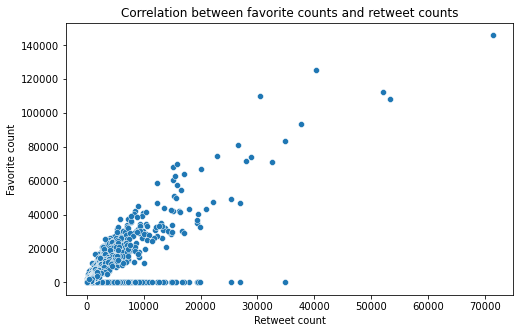

In [81]:
# Correlation between favorite_count and retweet_count

x = twitter_dog_data['retweet_count']
y = twitter_dog_data['favorite_count']

fig = plt.figure()
sns.scatterplot(data=twitter_dog_data, x=x, y=y)

plt.title("Correlation between favorite counts and retweet counts")
plt.xlabel("Retweet count");
plt.ylabel("Favorite count");
fig.set_figheight(5)
fig.set_figwidth(8)

plt.savefig('correlation_new')

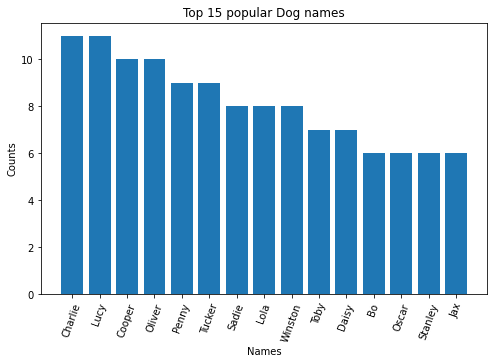

In [38]:
# Gathering and order data for the 'Top 15 popular Dog names' Histogram
# In my Jupiter Notebook i had no problems to order the names from max to min
# i don't know why it is different in udacity workspace

dog_count = twitter_dog_data.name.value_counts().head(15) 
dog_count_df = pd.DataFrame(data=dog_count)
dog_count_df.index.names = ['Names']


fig = plt.figure()
plt.bar(dog_count_df.index, dog_count_df.name)
plt.xticks(rotation=70);
plt.xlabel('Names') 
plt.ylabel('Counts') 
plt.title('Top 15 popular Dog names');
fig.set_figheight(5)
fig.set_figwidth(8)

plt.savefig('names_new')



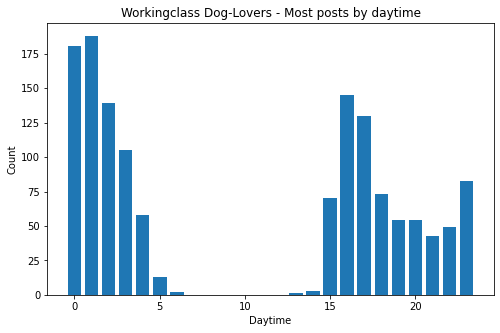

In [39]:
x = pd.DataFrame(twitter_dog_data['timestamp'].dt.hour)
x = x.timestamp.value_counts().sort_values(ascending=False)
x = pd.DataFrame(x)


fig = plt.figure()
plt.bar(x.index,x['timestamp'])
plt.xlabel('Daytime') 
plt.ylabel('Count') 
plt.title('Workingclass Dog-Lovers - Most posts by daytime')
fig.set_figheight(5)
fig.set_figwidth(8);

plt.savefig('daytime_new')